In [2]:
import pandas as pd
df=pd.read_csv("musae_facebook_edges.csv",sep=",",nrows=1000)
df

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829
...,...,...
995,70,18911
996,70,21366
997,70,3663
998,70,19504


Graph with 1008 nodes and 1000 edges


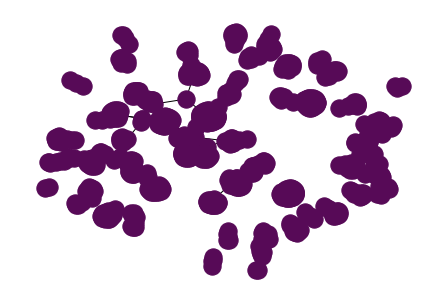

In [3]:
import networkx as nx
G=nx.from_pandas_edgelist(df,'id_1','id_2')
print(nx.info(G))
nx.draw(G,node_color='#570A57')

In [4]:
nx.edge_betweenness_centrality(G)


{(0, 18427): 1.9703346416355354e-06,
 (1, 21708): 0.0003270755505114989,
 (1, 22208): 0.0003270755505114989,
 (1, 22171): 0.0003270755505114989,
 (1, 6829): 0.0003270755505114989,
 (1, 16590): 0.0003270755505114989,
 (1, 20135): 0.0003270755505114989,
 (1, 8894): 0.0003270755505114989,
 (1, 15785): 0.0003270755505114989,
 (1, 10281): 0.0003270755505114989,
 (1, 22265): 0.0003270755505114989,
 (1, 7136): 0.0003270755505114989,
 (1, 22405): 0.0003270755505114989,
 (1, 10379): 0.0003270755505114989,
 (1, 13737): 0.0003270755505114989,
 (1, 8533): 0.0003270755505114989,
 (1, 14344): 0.0003270755505114989,
 (1, 2812): 0.0003270755505114989,
 (1, 5755): 0.0003270755505114989,
 (1, 16260): 0.0003270755505114989,
 (1, 15026): 0.0003270755505114989,
 (1, 17370): 0.0003270755505114989,
 (1, 17460): 0.0003270755505114989,
 (1, 8049): 0.0003270755505114989,
 (1, 5307): 0.0003270755505114989,
 (1, 4987): 0.0003270755505114989,
 (1, 18304): 0.0003270755505114989,
 (1, 12305): 0.0003270755505114989,


In [5]:
list(nx.connected_components(G))

[{0, 18427},
 {1,
  9,
  10,
  14,
  18,
  50,
  56,
  197,
  496,
  723,
  961,
  1041,
  1187,
  1209,
  1339,
  1635,
  1943,
  2075,
  2224,
  2327,
  2442,
  2684,
  2773,
  2812,
  2904,
  3128,
  3259,
  3279,
  3530,
  3695,
  3848,
  3935,
  4305,
  4328,
  4502,
  4779,
  4987,
  5046,
  5057,
  5228,
  5280,
  5307,
  5398,
  5458,
  5622,
  5755,
  5822,
  5943,
  5994,
  6037,
  6096,
  6441,
  6829,
  7136,
  7301,
  7320,
  7951,
  7966,
  8002,
  8004,
  8049,
  8139,
  8232,
  8389,
  8533,
  8606,
  8894,
  9105,
  9220,
  9240,
  9379,
  9525,
  9642,
  9677,
  9745,
  9872,
  9934,
  9946,
  10109,
  10182,
  10281,
  10379,
  10418,
  10426,
  10468,
  10554,
  10611,
  10622,
  10641,
  10707,
  11034,
  11315,
  11323,
  11332,
  11498,
  11557,
  11644,
  11804,
  12017,
  12305,
  12842,
  12993,
  13197,
  13511,
  13576,
  13737,
  14031,
  14164,
  14213,
  14344,
  14392,
  14497,
  14547,
  14597,
  14666,
  15026,
  15071,
  15174,
  15323,
  15531,
  157

In [6]:
import networkx as nx
partition_sequence = []
G=nx.from_pandas_edgelist(df,'id_1','id_2')
for _ in range(G.number_of_edges()):
    my_edge_betweenness = nx.edge_betweenness_centrality(G)
    most_valuable_edge = max(G.edges(), key=my_edge_betweenness.get)
    G.remove_edge(*most_valuable_edge)
    my_partition = list(nx.connected_components(G))
    partition_sequence.append(my_partition)

In [7]:
len(partition_sequence), nx.from_pandas_edgelist(df,'id_1','id_2').number_of_edges()


(1000, 1000)

In [8]:
len(partition_sequence[0])


44

In [9]:
len(partition_sequence[-1]),  nx.from_pandas_edgelist(df,'id_1','id_2').number_of_nodes()

(1008, 1008)

In [10]:
G =  nx.from_pandas_edgelist(df,'id_1','id_2')
modularity_sequence = [nx.community.quality.modularity(G, p) for p in partition_sequence]
modularity_sequence

[0.9028364999999999,
 0.9130864999999999,
 0.9220685,
 0.9220685,
 0.9346604999999999,
 0.9346604999999999,
 0.9385465,
 0.9402195000000001,
 0.9402195000000001,
 0.9427295000000001,
 0.9427295000000001,
 0.9431370000000001,
 0.9434860000000002,
 0.9441435,
 0.944346,
 0.944346,
 0.944162,
 0.9438185,
 0.9438185,
 0.9431714999999999,
 0.9427369999999999,
 0.9427369999999999,
 0.9418305,
 0.9411094999999999,
 0.940302,
 0.939394,
 0.9384854999999999,
 0.9375764999999998,
 0.9366669999999998,
 0.9357569999999997,
 0.9348464999999997,
 0.9339354999999997,
 0.9330239999999996,
 0.9321119999999996,
 0.9311994999999996,
 0.9302864999999996,
 0.9293729999999996,
 0.9284589999999995,
 0.9276149999999994,
 0.9267004999999994,
 0.9257854999999994,
 0.9248699999999993,
 0.9240004999999993,
 0.9230844999999993,
 0.9221679999999993,
 0.9212509999999993,
 0.9203334999999991,
 0.9194154999999992,
 0.9184969999999991,
 0.9175779999999991,
 0.916658499999999,
 0.915738499999999,
 0.914817999999999,
 0.

Text(0.5, 0, 'Algorithm step')

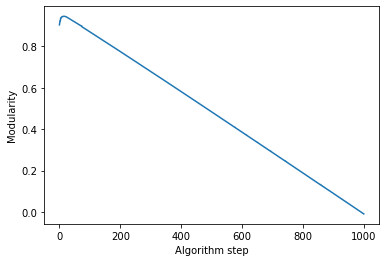

In [11]:
import matplotlib.pyplot as plt
plt.plot(modularity_sequence)
plt.ylabel('Modularity')
plt.xlabel('Algorithm step')

In [12]:
def my_modularity(partition):
    return nx.community.quality.modularity(G, partition)
best_partition = max(partition_sequence, key=my_modularity)
best_partition

[{0, 18427},
 {1,
  50,
  197,
  2812,
  3530,
  4987,
  5228,
  5280,
  5307,
  5755,
  6441,
  6829,
  7136,
  7320,
  8049,
  8533,
  8606,
  8894,
  9240,
  9379,
  9934,
  10281,
  10379,
  10554,
  10707,
  11557,
  12305,
  12993,
  13576,
  13737,
  14031,
  14213,
  14344,
  15026,
  15785,
  15969,
  16260,
  16590,
  17370,
  17460,
  17694,
  18304,
  19388,
  19743,
  20135,
  20153,
  21708,
  21729,
  22171,
  22208,
  22265,
  22405},
 {56,
  496,
  723,
  1339,
  1635,
  3695,
  3935,
  4305,
  4779,
  5057,
  6096,
  7951,
  9642,
  9872,
  13197,
  15071,
  16887,
  18853,
  18970,
  20024,
  20538,
  20781},
 {2,
  126,
  2629,
  5857,
  6353,
  8495,
  9048,
  11537,
  13205,
  17554,
  17728,
  19337,
  22304},
 {3, 293, 3479, 5826, 9654, 10945, 11319, 16742, 17346, 19753, 22338},
 {4,
  67,
  187,
  791,
  1182,
  1377,
  1443,
  1489,
  1879,
  1882,
  1997,
  2004,
  2282,
  2732,
  2830,
  2983,
  3676,
  3891,
  4109,
  4738,
  5147,
  5356,
  5730,
  6329,
 

In [13]:
def create_partition_map(partition):
    partition_map = {}
    for idx, cluster_nodes in enumerate(partition):
        for node in cluster_nodes:
            partition_map[node] = idx
    return partition_map

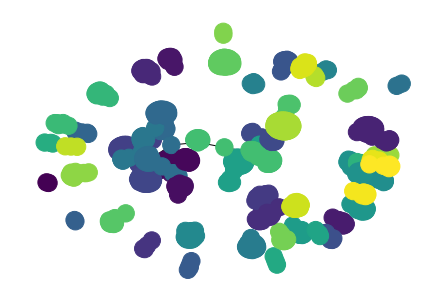

In [14]:
best_partition_map = create_partition_map(best_partition)

node_colors = [best_partition_map[n] for n in G.nodes()]
nx.draw(G, node_color=node_colors)

In [15]:
nx.community.quality.modularity(G, best_partition)


0.944346